In [40]:
import pandas as pd

## Import data

In [2]:
df = pd.read_csv("data/res_2000.csv", index_col='x')
df.index = pd.to_datetime(df.index)
df.shape

(5221, 287)

Keep at least 1260 days and 100 attributs

In [3]:
df

,FPX1,SHCP,SPXX,SX5P,A.CWI,A.XUS,AUD.,BBG.,BBG.9,BBG.G,...,FDCPX,HSI,GSPTSE,GOLDPMGBD228NLBM,WILL4500IND,WILL4500PR,WILL5000IND,WILL5000INDFC,WILL5000PR,WILL5000PRFC
x,,,,,,,,,,,,,,,,,,,,,
2000-12-29,5926.42,2073.48,359.79,4557.13,100.00,100.00,0.556,930.68,1031.64,1052.19,...,48.034107,15095.53027,8933.700195,274.45,5.44,415.27,39.80,39.80,12175.88,12175.88
2001-01-02,5798.90,2103.47,354.83,4492.27,98.50,99.55,0.559,938.84,1041.97,1062.98,...,43.306885,14869.94043,8611.500000,271.10,5.14,392.67,38.46,38.46,11763.92,11763.92
2001-01-03,5684.05,2123.90,351.38,4456.97,100.52,98.95,0.563,933.62,1035.56,1055.14,...,51.329395,14589.58008,8937.799805,267.15,5.46,416.89,40.48,40.48,12380.26,12380.26
2001-01-04,5815.99,2117.41,356.54,4534.10,100.67,100.32,0.565,938.37,1041.96,1061.03,...,51.109100,15235.03027,8905.700195,267.10,5.36,409.75,39.97,39.97,12224.42,12224.42
2001-01-05,5758.02,2125.30,355.10,4503.22,99.47,100.50,0.571,943.45,1048.96,1067.27,...,47.097843,15447.61035,8690.200195,267.40,5.16,393.93,38.82,38.82,11872.66,11872.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17,6054.82,3445.55,424.91,3282.11,345.32,290.16,0.777,2311.76,3046.35,2673.06,...,117.470001,29034.11914,18983.099610,1729.65,39.22,2239.97,198.70,200.15,41740.28,42154.70
2021-03-18,6062.79,3463.07,426.59,3296.68,342.92,291.90,0.777,2304.57,3038.96,2663.49,...,115.360001,29405.72070,18836.500000,1725.90,38.16,2179.18,195.33,196.45,41031.14,41373.33
2021-03-19,5997.96,3404.66,423.35,3276.68,341.93,289.84,0.777,2305.61,3037.98,2666.42,...,115.580002,28990.93945,18854.000000,1735.20,38.41,2193.44,195.49,196.80,41061.42,41443.13


Data from 2000-12-29 to 2021-03-23 (workdays)

## Prepare data

In [4]:
# Normalize series
df_norm = (df - df.mean()) / df.std()

In [5]:
# Create 21 days windows (without superposition)
def create_windows(df, window_size, window_shift=0):
    if window_shift < 1:
        window_shift = window_size
    
    dates = []
    windows = []
    i = 0
    
    while i <= df.shape[0] - window_size:
        w = df.iloc[i:i + window_size]
        dates.append(w.index[0])
        windows.append(w.values.T)
        
        i += window_shift
    
    return dates, windows
    
dates, windows = create_windows(df_norm, 63, 21)
len(windows)

246

In [6]:
windows[0]

array([[ 1.79576898,  1.64617587,  1.51144588, ...,  0.85539235,
         0.9853713 ,  0.88545878],
       [-0.51288297, -0.47904805, -0.45599878, ..., -0.49438038,
        -0.47477214, -0.47521214],
       [ 0.8218213 ,  0.74268662,  0.68764335, ...,  0.13928472,
         0.24665899,  0.1810857 ],
       ...,
       [-0.78748239, -0.8212946 , -0.77032395, ..., -0.91591833,
        -0.89522728, -0.91768464],
       [-0.65475869, -0.70883757, -0.62792929, ..., -0.86257959,
        -0.82974448, -0.86554765],
       [-0.66754957, -0.72124273, -0.64091152, ..., -0.87388819,
        -0.84128728, -0.87683509]])

In [7]:
dates[0]

Timestamp('2000-12-29 00:00:00')

In [8]:
df.columns.to_list()[:10]

['FPX1',
 'SHCP',
 'SPXX',
 'SX5P',
 'A.CWI',
 'A.XUS',
 'AUD.',
 'BBG.',
 'BBG.9',
 'BBG.G']

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from scripts.fc_means import fc_means_auto_clusters
from scripts.k_means import k_means_auto_clusters

In [10]:
k_values = []
max_cluster_size = []
for win in tqdm(windows):
    centers, y, k, s_values = k_means_auto_clusters(win)
    k_values.append(k)
    
    max_size = 0
    for c in range(k):
        size = sum(y == c)
        if size > max_size:
            max_size = size
    max_cluster_size.append(max_size)

100%|█████████████████████████████████████████| 246/246 [02:05<00:00,  1.96it/s]


In [11]:
q1 = np.quantile(max_cluster_size, 0.25)
q3 = np.quantile(max_cluster_size, 0.75)
iqr = q3 - q1
q1

131.25

In [26]:
d = np.asarray(dates)
m = np.asarray(max_cluster_size)
d[m > q3 + 1.5 * iqr].astype(str)

array(['2000-12-29 00:00:00', '2008-08-22 00:00:00',
       '2009-03-19 00:00:00', '2009-04-20 00:00:00'], dtype='<U19')

In [27]:
d[m < q1 - 1.5 * iqr].astype(str)

array(['2011-06-28 00:00:00', '2011-07-27 00:00:00',
       '2011-08-25 00:00:00', '2011-09-23 00:00:00',
       '2011-10-24 00:00:00', '2011-11-22 00:00:00',
       '2012-03-21 00:00:00', '2012-05-21 00:00:00',
       '2012-08-16 00:00:00', '2012-09-14 00:00:00',
       '2012-10-15 00:00:00'], dtype='<U19')

In [39]:
with open("test.txt", "w") as f:
    for date in d[m > q3 + 1.5 * iqr].astype(str):
        f.write(date[:10] + "\n")

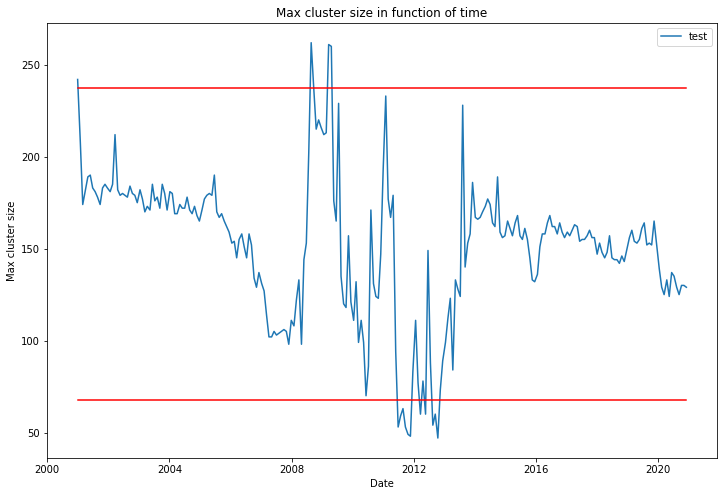

In [47]:
plt.figure(figsize=(12,8))

plt.title("Max cluster size in function of time")
plt.xlabel("Date")
plt.ylabel("Max cluster size")
plt.plot(dates, max_cluster_size)
plt.plot(dates, np.full(len(dates), q3 + 1.5 * iqr), c='r')
plt.plot(dates, np.full(len(dates), q1 - 1.5 * iqr), c='r')
plt.legend(["test"])
# plt.savefig("images/km_max_63_21.png")
plt.show()

Taille cluster : sentiment du marché  
Sous stress : peu de cluster volumineux ?

Outlier : loi normale, quartiles ?

Structure : regroupement des séries  
Utiliser une valeur à plot, mesure de qualité (table de contingence)  
Pas besoin de taille de cluster identique  
comparer cluster t et t+1

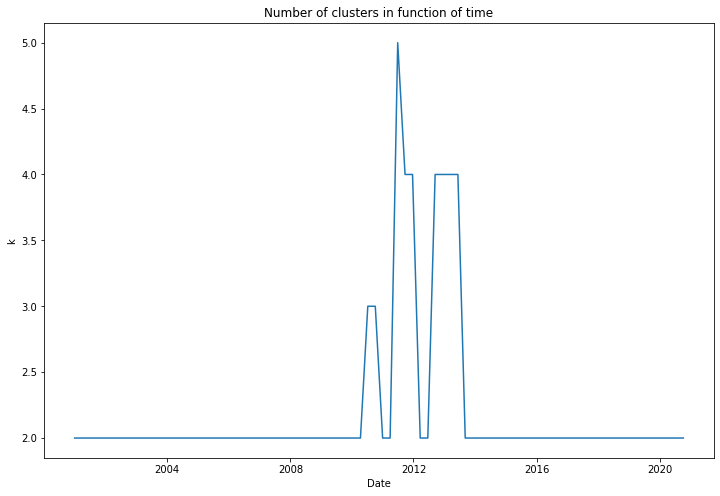

In [12]:
plt.figure(figsize=(12,8))

plt.title("Number of clusters in function of time")
plt.xlabel("Date")
plt.ylabel("k")
plt.plot(dates, k_values)
# plt.savefig("images/km_k_63_21.png")
plt.show()